In [63]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
df1=pd.read_csv('data_M4.csv')
grouped=df1.groupby(['ID'])
#df2_1用于存放20-40年龄的数据
df2_1=df1.iloc[:0]
#df2_2用于存放40-60年龄的数据
df2_2=df1.iloc[:0]

for name,group in grouped:
    if(len(group)>4 and 20<=float(group.iloc[:1]['Age'])<=40):
        df2_1=pd.concat([df2_1,group])
    if(len(group)>4 and 40<float(group.iloc[:1]['Age'])<=60):
        df2_2=pd.concat([df2_2,group])

In [64]:
def return_result(df_CD4):
    hiv_0_list=[]
    hiv_1_list=[]
    hiv_2_list=[]
    hiv_3_list=[]
    hiv_4_list=[]
    grouped=df_CD4.groupby(['ID'])
    for name,group in grouped:
        hiv_0_list.append(float(group.iloc[:1]['CD4_Count']))
        hiv_1_list.append(float(group.iloc[1:2]['CD4_Count']))
        hiv_2_list.append(float(group.iloc[2:3]['CD4_Count']))
        hiv_3_list.append(float(group.iloc[3:4]['CD4_Count']))
        hiv_4_list.append(float(group.iloc[4:5]['CD4_Count']))
    hiv_0=sum(hiv_0_list)/len(hiv_0_list)
    hiv_1=sum(hiv_1_list)/len(hiv_1_list)
    hiv_2=sum(hiv_2_list)/len(hiv_2_list)
    hiv_3=sum(hiv_3_list)/len(hiv_3_list)
    hiv_4=sum(hiv_4_list)/len(hiv_4_list)
    return [hiv_0,hiv_1,hiv_2,hiv_3,hiv_4]
high_age_list=return_result(df2_2)
low_age_list=return_result(df2_1)

In [65]:
high_age_list

[3.0324688888888893,
 3.4869177777777787,
 3.483164444444444,
 3.254982222222223,
 3.148797777777778]

In [66]:
low_age_list

[2.8403576923076903,
 3.200075641025641,
 2.9669602564102564,
 2.844747435897436,
 2.695060256410256]

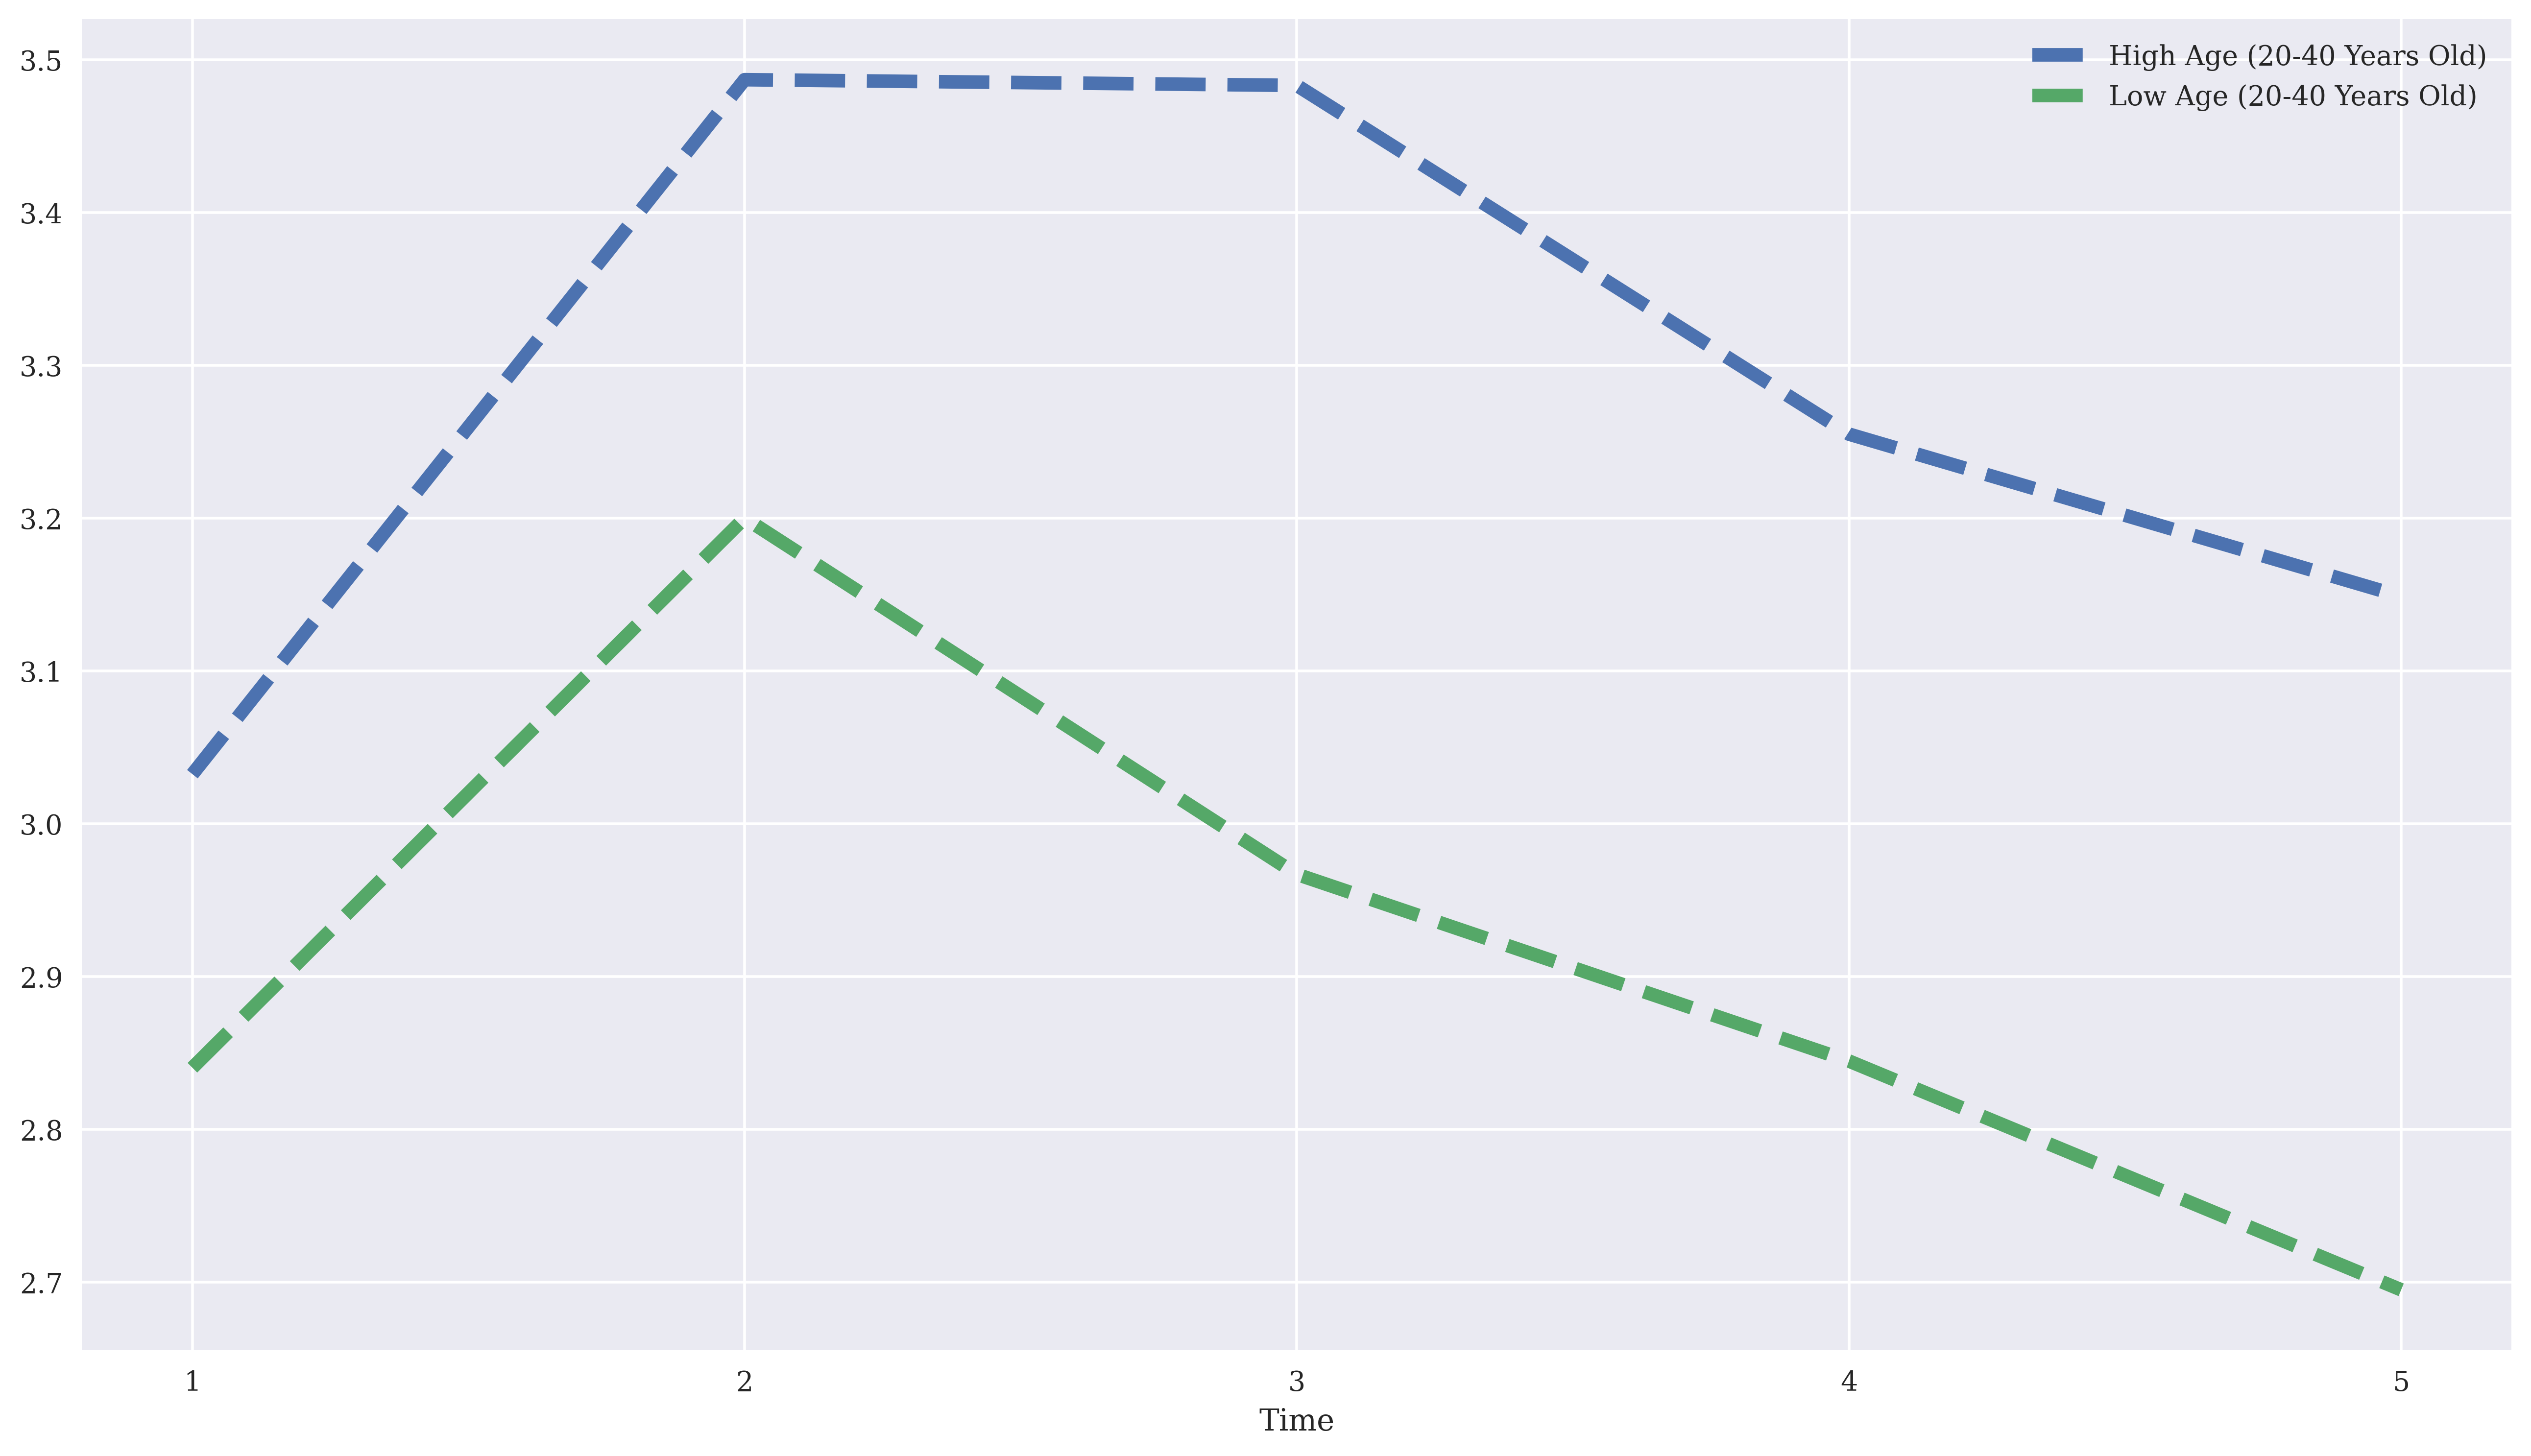

In [67]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(16,9),dpi=400)
plt.plot(range(1,6),high_age_list,ls='--',lw=5,label='High Age (20-40 Years Old)')
plt.plot(range(1,6),low_age_list,ls='--',lw=5,label='Low Age (20-40 Years Old)')
#plt.title('免疫能力强的患者HIV病毒变化图像',fontproperties=font)
plt.ylabel('',fontproperties=font)
plt.xlabel('Time')
plt.xticks(range(1,6),[1,2,3,4,5])
plt.legend()
plt.show()

In [75]:
import math
#观察出来时刻数列是 3，8，10，14，17
t=np.array(low_age_list[1:])
t=t+1
#将数列进行一次累加求和
t1=np.cumsum(t)
print(t1)
print(t)

[ 4.20007564  8.1670359  12.01178333 15.70684359]
[4.20007564 3.96696026 3.84474744 3.69506026]


In [76]:
min=math.e**(-2/(len(t)+1))
max=math.e**(2/(len(t)+2))
#首先验证阶比是否满足条件
for i in range(2,len(t)):
    j=t[i-1]/t[i]
    if(j<min or j>max):
        print(i)

In [77]:
#生成邻均值数列（相邻两个数据的均值）
z1= ((t1[:len(t1) - 1] + t1[1:])/2.0).reshape(-1,1)
print(z1)

[[ 6.18355577]
 [10.08940962]
 [13.85931346]]


In [78]:
Y=t[1:].reshape(-1,1)
B=np.append(-z1,np.ones_like(z1),axis=1)
print(B)

[[ -6.18355577   1.        ]
 [-10.08940962   1.        ]
 [-13.85931346   1.        ]]


In [79]:
#使用最小二乘法求解a，b的值（感谢大佬铺路）
[[a],[b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Y)#计算待估参数
#第i时刻的预测值，解一阶累加得到的方程（注意下标 2，3，4，.....）
#predict=(t[0]-b/a)*np.exp(-a*(i-1))-(t[0]-b/a)*np.exp(-a*(i-2))
residual=np.array([0])
predict_list=[]
for i in range(0,len(t)):
    predict=(t[0]-b/a)*np.exp(-a*(i))-(t[0]-b/a)*np.exp(-a*(i-1))
    predict_list.append(predict-1)
    residual=np.append(residual,(t[i]-predict)/t[i])
print(a,b)

0.03539837942316304 4.191133929399549


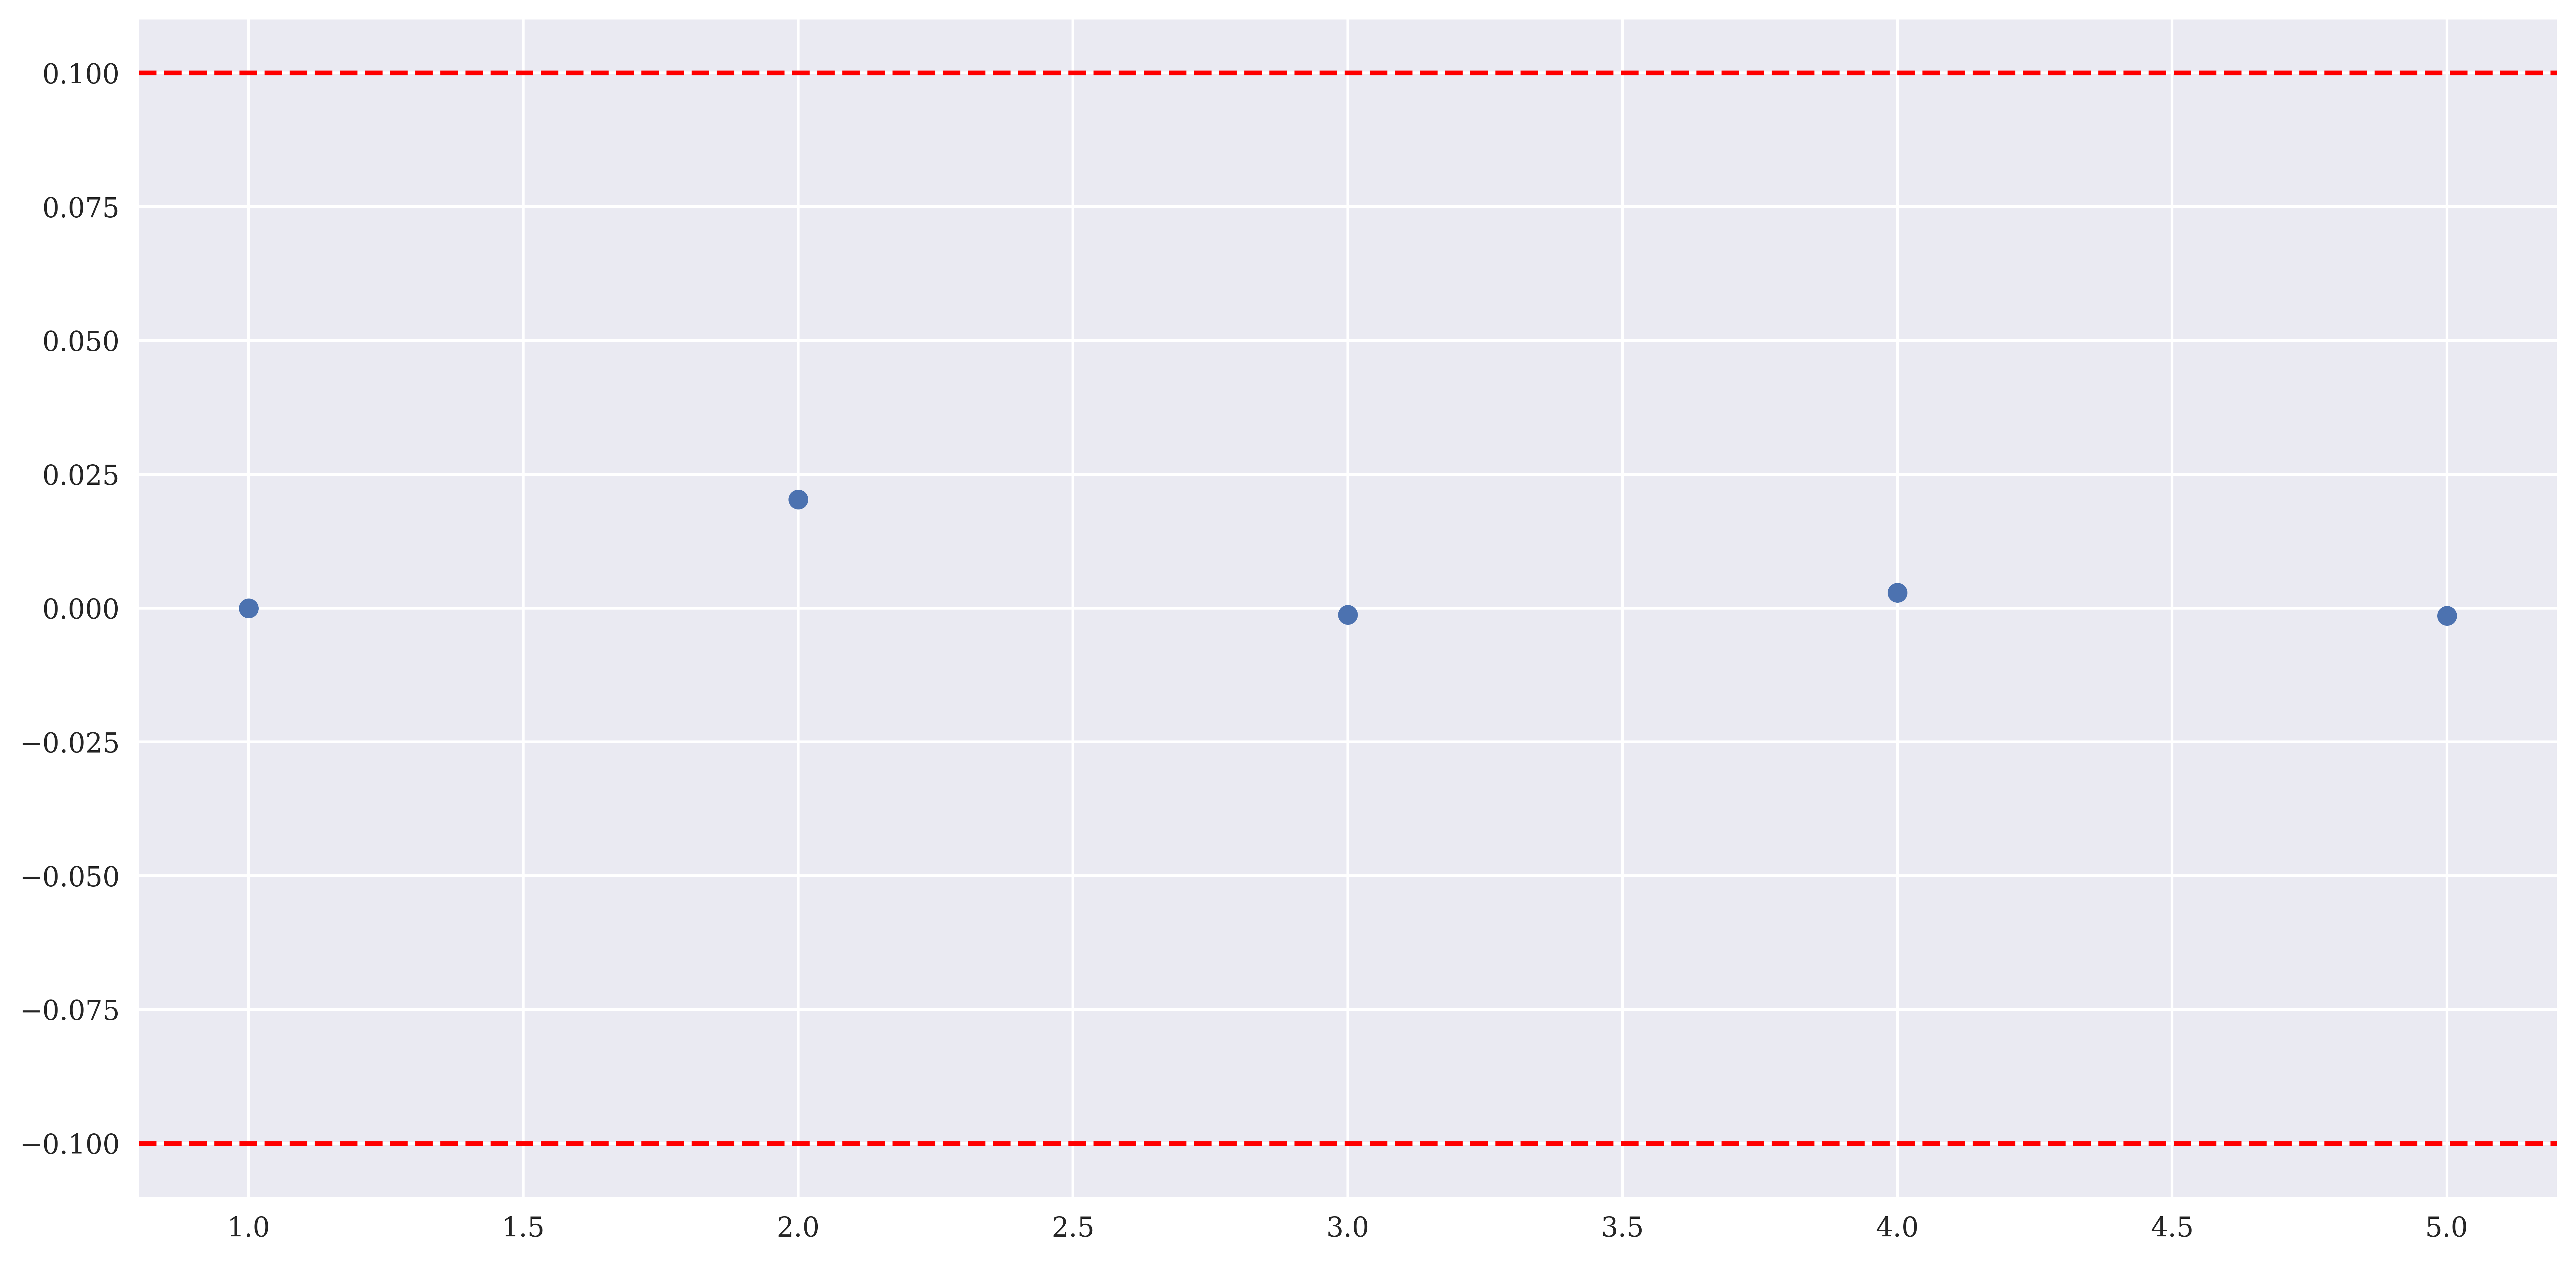

In [80]:
plt.figure(figsize=(16,8),dpi=600)
plt.scatter(np.array([i+1 for i in range(len(residual))]),residual)
plt.axhline(y=0.10,ls='--',c='r')
plt.axhline(y=-0.1,ls='--',c='r')
plt.show()

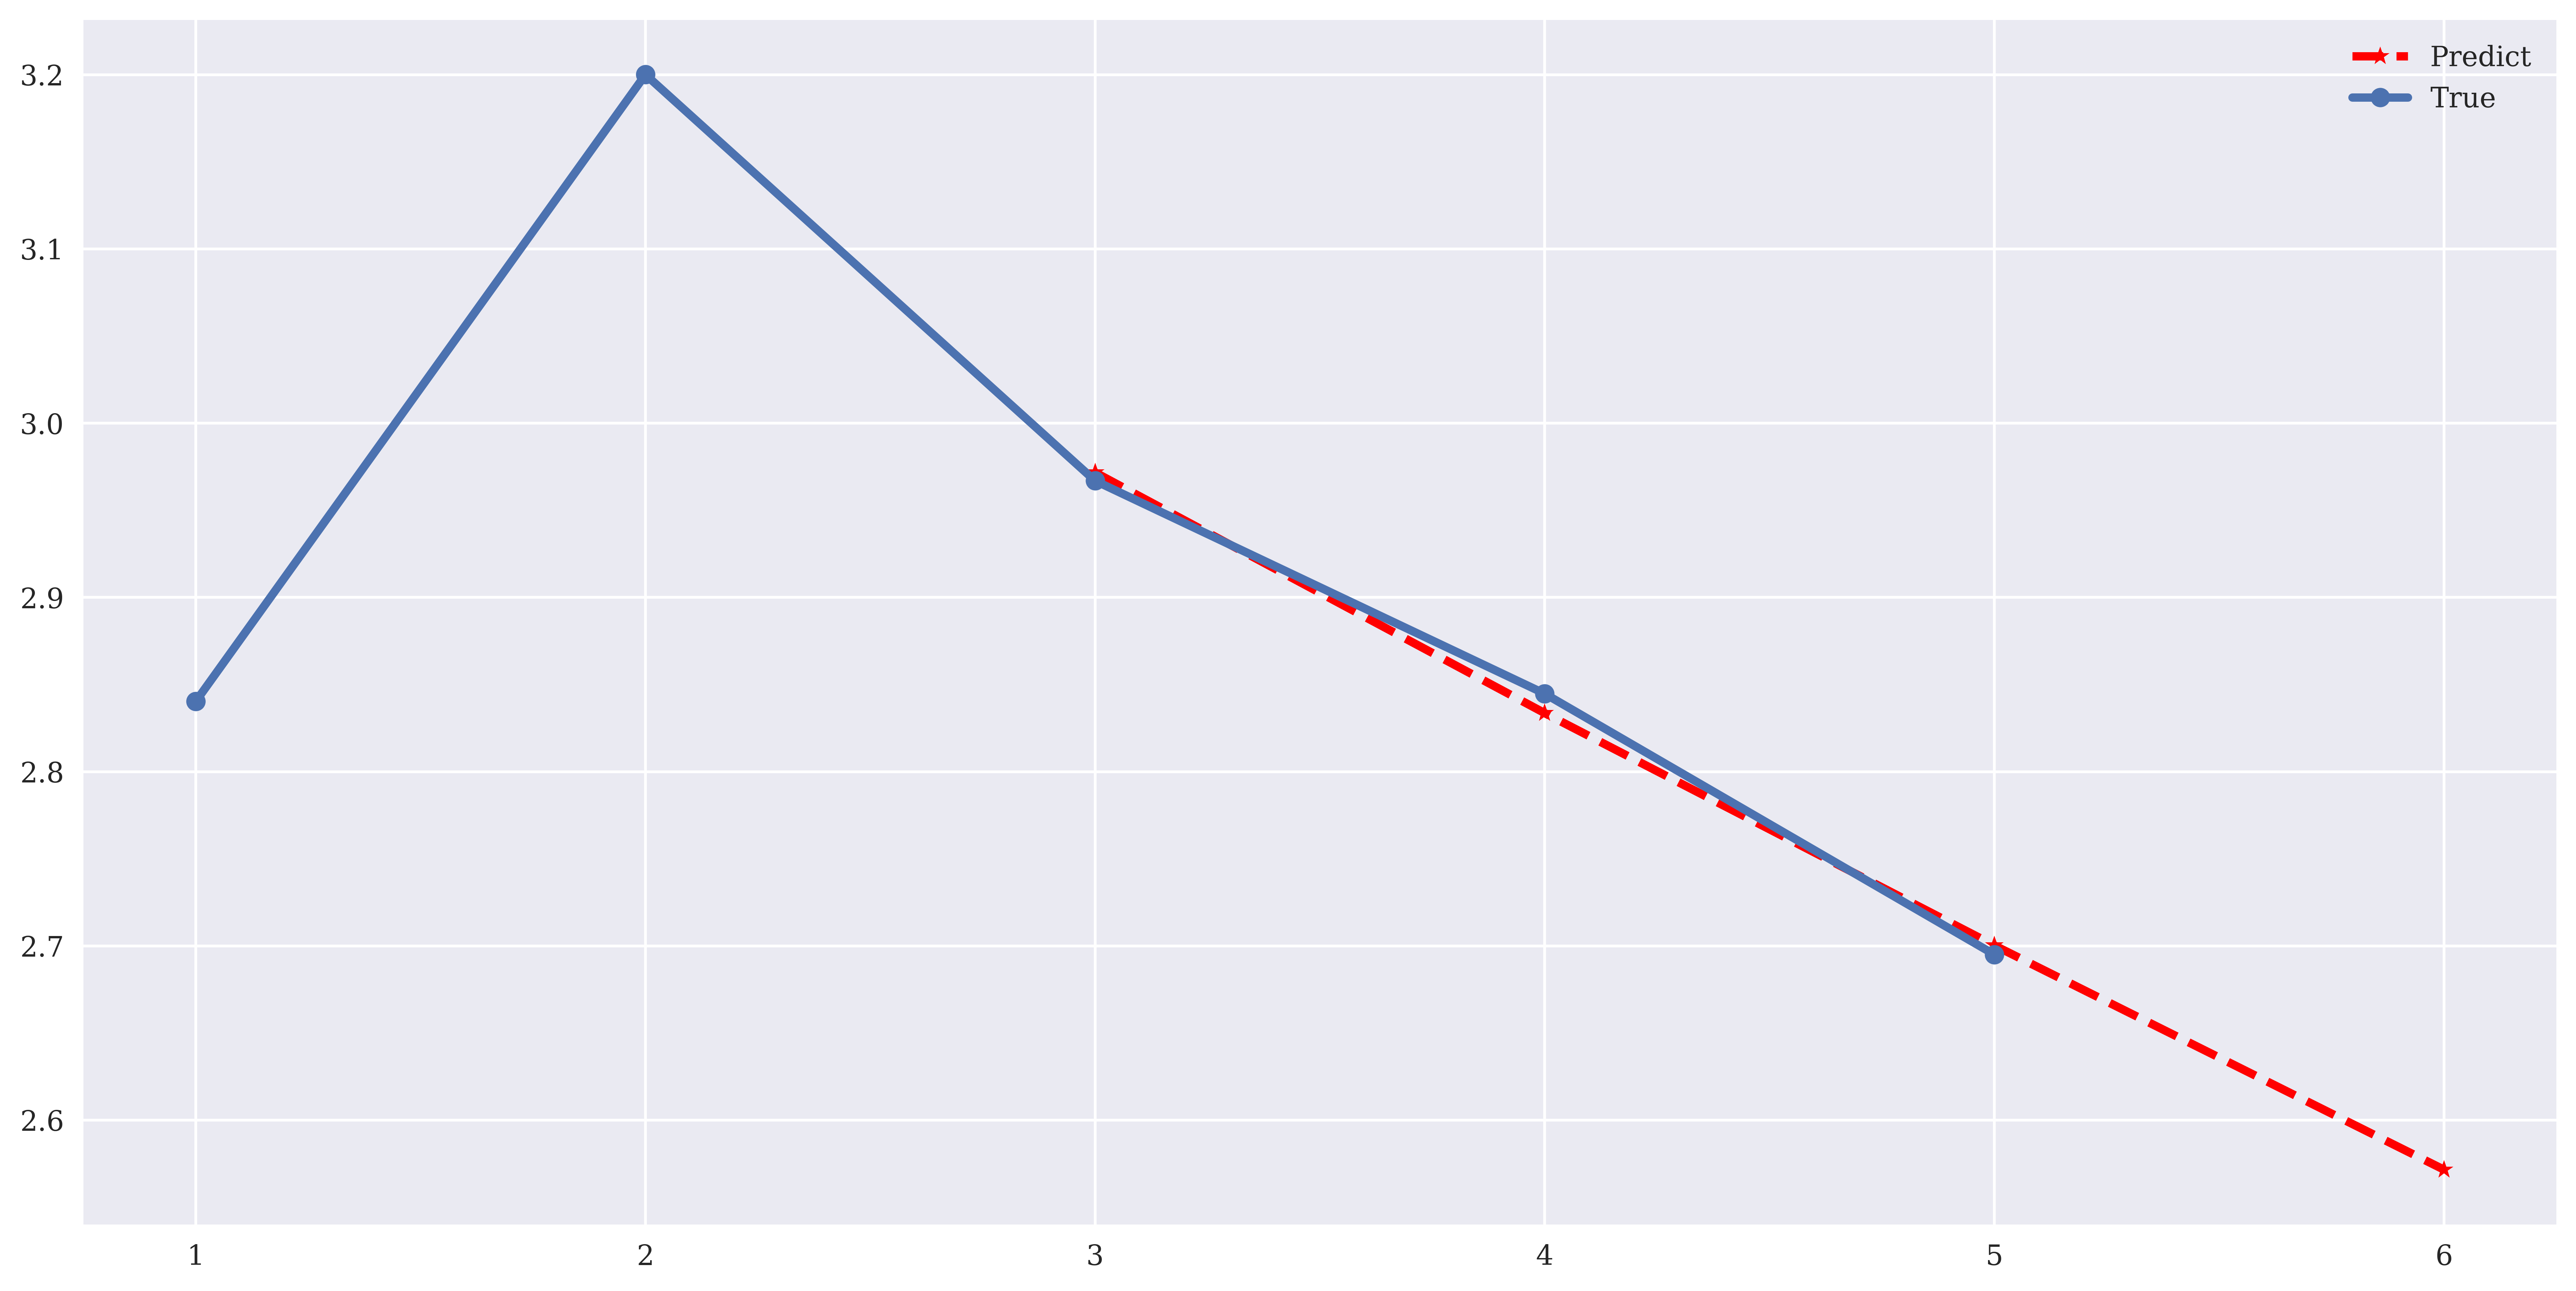

In [82]:
#绘制预测数据的分布图像
predict_list=[]
for i in range(1,5):
    predict=(t[0]-b/a)*np.exp(-a*(i))-(t[0]-b/a)*np.exp(-a*(i-1))
    predict_list.append(predict-1)
plt.figure(figsize=(16,8),dpi=600)
#plt.title('line chart')
plt.plot([3,4,5,6],predict_list,marker='*',lw=3,ls='--',c='r')
plt.plot([i+1 for i in range(len(high_age_list))],[i for i in low_age_list],marker='o',lw=3)
plt.ylabel('')
#注意legend里面传的参数是列表
plt.legend(['Predict','True'])
plt.show()